# Trace Estimator  
https://doi.org/10.1016/0377-0427(96)00018-0 
## b) Algorithm 1 with Gauss-Radau quadrature

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#for part e)
from matrices import * 
import time 
from scipy.linalg import block_diag
from helpers import *

In [ ]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
u = np.zeros(n)
u[4] = 1
u = np.random.randn(n)
def f(x):
    return 1/x
    
tol = 1e-5
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

In [ ]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)
def f(x):
    return 1/x
#notice that in python Z=1/A outputs Z[i,j]=1/A[i,j] which isn't what we want but! With the way our algorithm is define
#and the way it makes computations it doesn't matter


u = np.zeros(n)
u[1] = 1
#u = np.random.randn(n)
tol = 1e-3
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

In [ ]:
n = 5
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

vec1 = -1*np.ones(n-1)
vec2 = 2*np.ones(n)
vec3 = -1*np.ones(n-1)
A = tridiag(vec1, vec2, vec3)

u = np.zeros(n)
u[1] = 1
# u = np.random.randn(n)
tol = 1e-2
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [L, U]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

## d) Algorithm 2 

In [ ]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

In [ ]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)

def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

## e) Numerical experiments

In [2]:
#defining all the matrices at once

#heat_flow_matrix 
N=10 #in the paper they use n=900 but as we didn't save the matrix in sparse format we have a memory over run
      #I first did it with n=100 but the computation time was too long 
nu=0.2 
heat_flow_matrix=heat_flow_function(nu,N)

# VFH matrix
VFH_matrix=-VFH_function(2)

#Poisson matrix
poisson_matrix=Poisson_function(10)

#Wathen matrix
nx=2
ny=3 #in the paper nx=ny=12
wathen_matrix=wathen_ge(nx, ny)

#Lehmer matrix
lehmer_matrix=Lehmer_function(50) #in the paper n=200

#Pei matrix
alpha=1
n=100 #in the paper tested for n=300 and alpha=1
pei_matrix=Pei_function(alpha, n)

In [7]:
matrix_array=[heat_flow_matrix, VFH_matrix, poisson_matrix, wathen_matrix, lehmer_matrix, pei_matrix]
matrix_names=['heat_flow_matrix', 'VFH_matrix', 'poisson_matrix', 'wathen_matrix', 'lehmer_matrix', 'pei_matrix']

running_time_array=[]
computed_value_array=[]

for i in range(len(matrix_array)):
    array_1, array_2=numerical_experiments(matrix_array[i])
    running_time_array.append(array_1)
    computed_value_array.append(array_2)

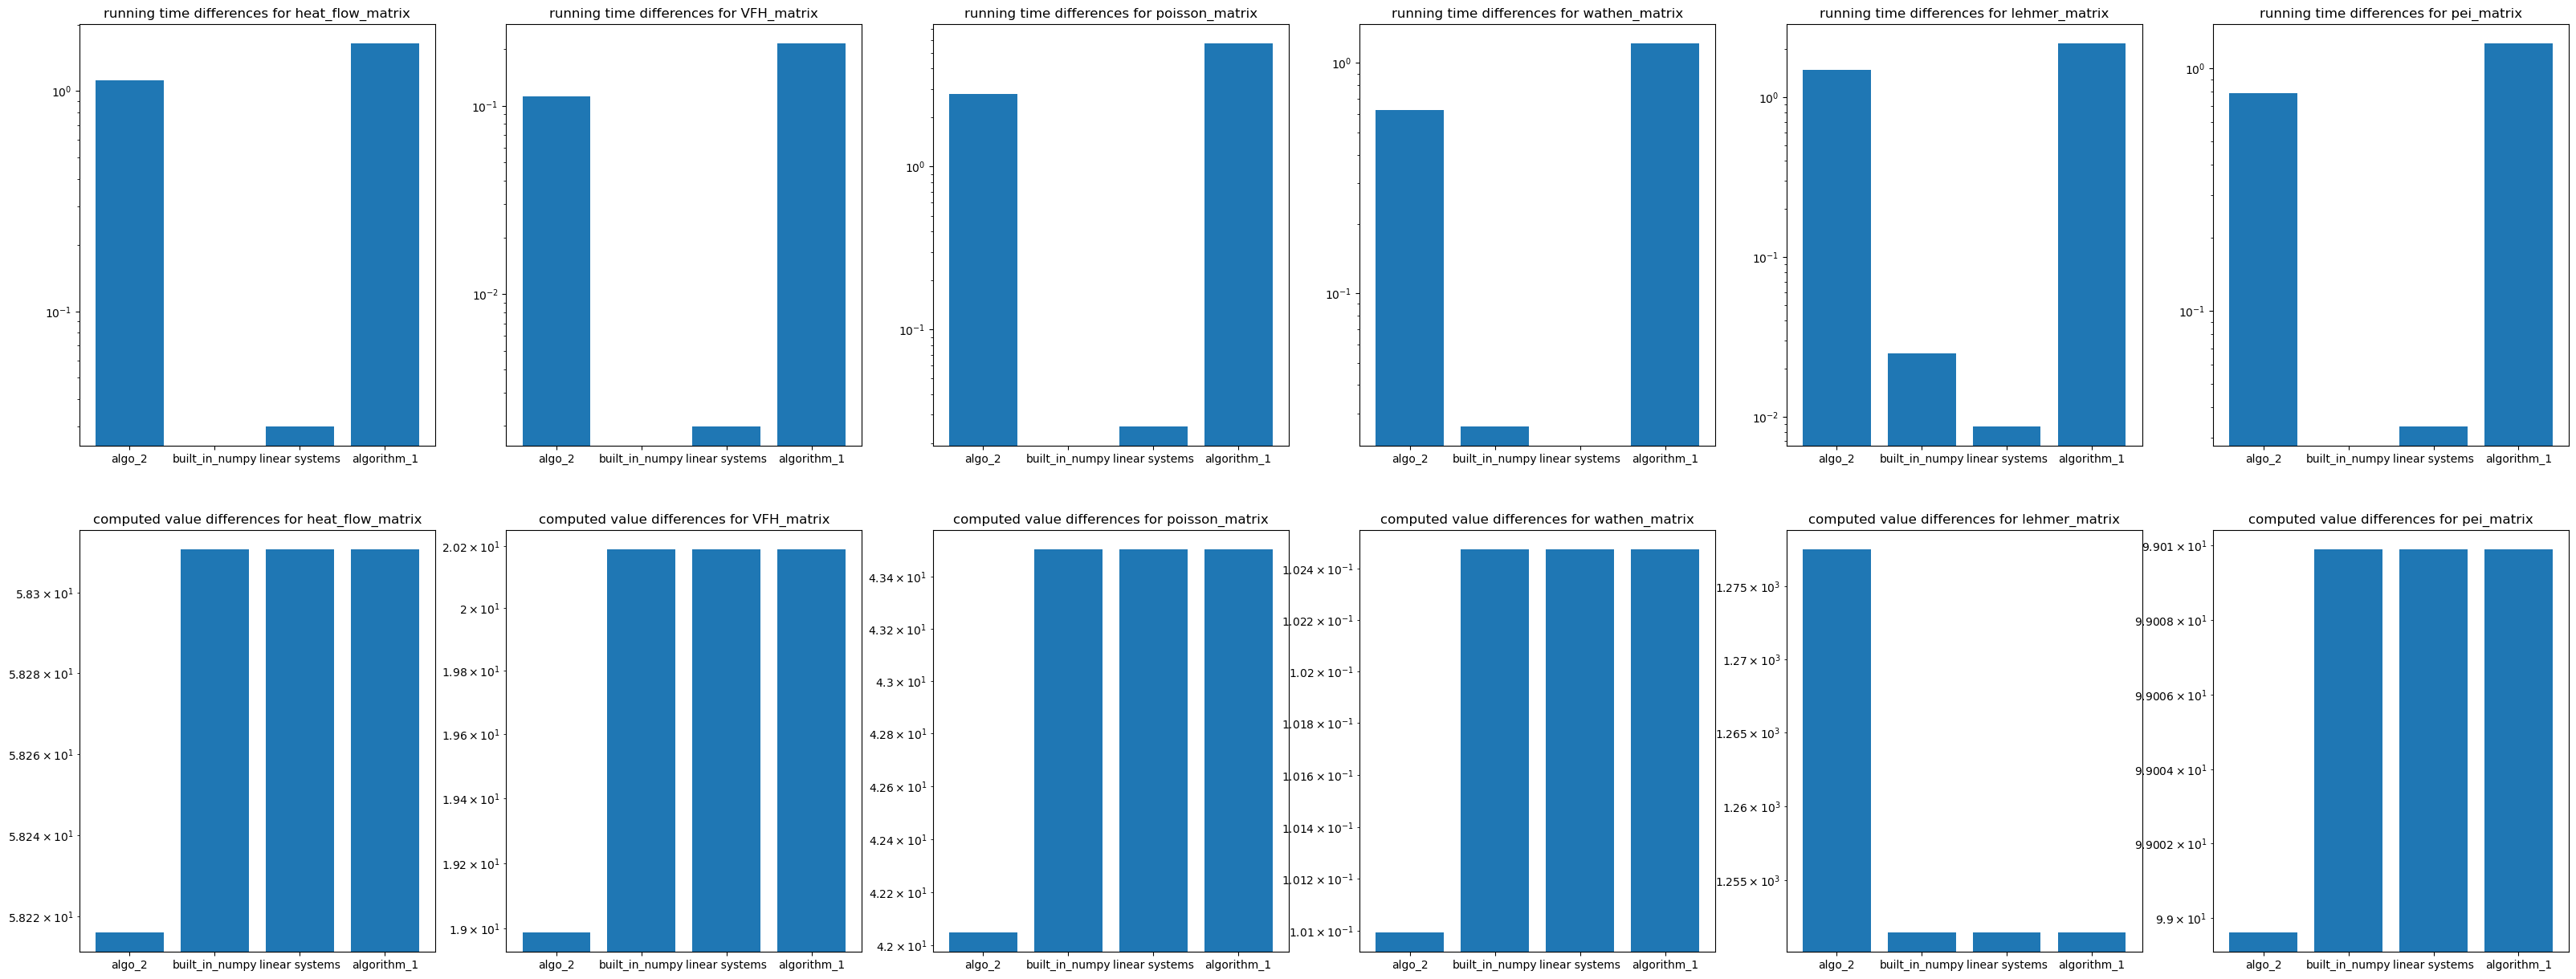

In [22]:
#this cell and the above one can be combined

L=len(matrix_array)

fig, axs=plt.subplots(2,L, figsize= (40,15), sharey = False, sharex = False) #see if we keep sharey and sharex true


for j in range(L):
    axs[0][j].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], running_time_array[j])
    #we'll see if we keep the plotting in logscale
    axs[0][j].set_yscale('log')
    axs[0][j].set_title('running time differences for '+ matrix_names[j], fontsize=12)
    
    axs[1][j].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], computed_value_array[j])
    #we'll see if we keep the plotting in logscale
    axs[1][j].set_yscale('log')
    axs[1][j].set_title('computed value differences for '+ matrix_names[j], fontsize=12)

### Example 1: the heat flow matrix(keeping it as a template)

In [ ]:
def f(x):
    return 1/x

tol = 1e-5

In [ ]:
N=10 #in the paper they use n=900 but as we didn't save the matrix in sparse format we have a memory over run
      #I first did it with n=100 but the computation time was too long 
nu=0.2 
heat_flow_matrix=heat_flow_function(nu,N)
n=heat_flow_matrix.shape[0]
heat_flow_running_time=np.zeros(4)
heat_flow_trace_value=np.zeros(4)
heat_flow_matrix

In [ ]:
#running time of algo 2

start=time.time()
L=algorithm_2(heat_flow_matrix,m=int(n/2),p=0.5, function=f, epsilon=tol) #for some m,p to tune 
execution_algo_2=time.time()-start 

heat_flow_running_time[0]=execution_algo_2
heat_flow_trace_value[0]=L[2]

In [ ]:
#running time using built in numpy functions
start=time.time()
Tr_A_inv=np.trace(np.linalg.inv(heat_flow_matrix))
execution_built_in=time.time()-start 
heat_flow_running_time[1]=execution_built_in
heat_flow_trace_value[1]=Tr_A_inv

In [ ]:
#running time using n linear systems

start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=e.T@np.linalg.solve(heat_flow_matrix,e)

execution_linear=time.time()-start
heat_flow_running_time[2]=execution_linear
heat_flow_trace_value[2]=Tr_A_inv
    

In [ ]:
#using algorithm 1
start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=algorithm_1(heat_flow_matrix,e,function=f, maxit=50, epsilon=1e-05)

execution_algo_1=time.time()-start
heat_flow_running_time[3]=execution_algo_1
heat_flow_trace_value[3]=(Tr_A_inv[0]+Tr_A_inv[1])/2

In [ ]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], heat_flow_running_time)
plt.yscale('log')
plt.title('Running time differences')

In [ ]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], heat_flow_trace_value)
plt.yscale('log')
plt.title('values computed')

### example 2: the VFH matrix

In [ ]:
VFH_matrix=-VFH_function(2) #issue!! For n=1,2 we need to do -VFH to have positive definite and for n>2 we need to find 
#another criterion than the eigenvalues as its eigenvalues are complex :( 

n=VFH_matrix.shape[0]
VFH_matrix_running_time=np.zeros(4)
VFH_matrix_trace_value=np.zeros(4)

In [ ]:
#running time of algo 2

start=time.time()
L=algorithm_2(VFH_matrix,m=int(n/2),p=0.5, function=f, epsilon=tol) #for some m,p to tune 
execution_algo_2=time.time()-start 

VFH_matrix_running_time[0]=execution_algo_2
VFH_matrix_trace_value[0]=L[2]

In [ ]:
#running time using built in numpy functions
start=time.time()
Tr_A_inv=np.trace(np.linalg.inv(VFH_matrix))
execution_built_in=time.time()-start 
VFH_matrix_running_time[1]=execution_built_in
VFH_matrix_trace_value[1]=Tr_A_inv

In [ ]:
#running time using n linear systems

start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=e.T@np.linalg.solve(VFH_matrix,e)

execution_linear=time.time()-start
VFH_matrix_running_time[2]=execution_linear
VFH_matrix_trace_value[2]=Tr_A_inv
    

In [ ]:
#using algorithm 1
start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=algorithm_1(VFH_matrix,e,function=f, maxit=50, epsilon=1e-05)

execution_algo_1=time.time()-start
VFH_matrix_running_time[3]=execution_algo_1
VFH_matrix_trace_value[3]=(Tr_A_inv[0]+Tr_A_inv[1])/2

In [ ]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], VFH_matrix_running_time)
plt.yscale('log')
plt.title('Running time differences')

In [ ]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], VFH_matrix_trace_value)
plt.yscale('log')
plt.title('values computed')

In [ ]:
def numerical_experiments(matrix):
    '''
    runs the numerical experiments and returns 2 array with the running time and the value found for each experiment
    
    matrix: numpy array the matrix we want to study
    '''
    #defining the required values
    
    n=matrix.shape[0]
    matrix_running_time=np.zeros(4)
    matrix_trace_value=np.zeros(4)
    tol = 1e-5
    
    def f(x):
        return 1/x
    
    #running time of algo 2

    start=time.time()
    L=algorithm_2(matrix,m=int(n/2),p=0.5, function=f, epsilon=tol) #for some m,p to tune 
    execution_algo_2=time.time()-start 

    matrix_running_time[0]=execution_algo_2
    matrix_trace_value[0]=L[2]
    
    #running time using built in numpy functions
    start=time.time()
    Tr_A_inv=np.trace(np.linalg.inv(matrix))
    execution_built_in=time.time()-start 
    matrix_running_time[1]=execution_built_in
    matrix_trace_value[1]=Tr_A_inv
    
    #running time using n linear systems

    start=time.time()
    Tr_A_inv=0

    for i in range (n):
        e=np.zeros(n)
        e[i]=1
        Tr_A_inv+=e.T@np.linalg.solve(matrix,e)

    execution_linear=time.time()-start
    matrix_running_time[2]=execution_linear
    matrix_trace_value[2]=Tr_A_inv
    
    #using algorithm 1
    start=time.time()
    Tr_A_inv=0

    for i in range (n):
        e=np.zeros(n)
        e[i]=1
        Tr_A_inv+=algorithm_1(matrix,e,function=f, maxit=50, epsilon=tol)

    execution_algo_1=time.time()-start
    matrix_running_time[3]=execution_algo_1
    matrix_trace_value[3]=(Tr_A_inv[0]+Tr_A_inv[1])/2
    
    return matrix_running_time, matrix_trace_value